In [1]:
# This is the script for filtering tracks that are in vicinity of China Mainland (<500 km of coastline).
# Input file: CMA best track -- CMA_Best_Tracks_Nodes.shp,  
#             China border shape file -- '/home/lzhou/GIS/China_Border/CHN_adm0.shp'
# Output Dir: /home/lzhou/Precipitation/Precipitation_Scripts/Output
# Outfile: CMA_500km_tracks.shp

In [2]:
import os
import numpy as np
import pandas as pd
from shapely.geometry import LineString, Point, Polygon
import geopandas as gpd
from pyproj import CRS
import seaborn as sns
import matplotlib.pyplot as plt

# Make some of the spatial queries running faster
from shapely import speedups
import shapely
speedups.enabled

True

In [3]:
# load the best track shape file
#indir = '/home/lzhou/Precipitation/Precipitation_Scripts/Output/'
indir = r'D:\GitHub\Precipitation_Scripts\Output'
nodes = gpd.read_file(os.path.join(indir,'CMA_Best_Tracks_Nodes.shp'))
tracks = gpd.read_file(os.path.join(indir,'CMA_Best_Tracks.shp'))

In [4]:
# get China shape file
#shapefile = '/home/lzhou/GIS/china-shapefiles-master/ne_10m_coastline.shp'
#shapefile = '/home/lzhou/GIS/China_Border/CHN_adm0.shp'
#cn_shape = gpd.read_file(shapefile)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cn_shape = world[world.name=='China'].copy()
cn_shape.reset_index(drop=True,inplace=True)

In [5]:
#tracks = tracks[tracks.Year==2018].reset_index(drop=True)
#nodes = nodes[nodes.Year==2018].reset_index(drop=True)

In [6]:
#m = tracks.loc[[8],'geometry'].plot()
#cn_shape.boundary.plot(ax=m)

#tracks.loc[8,'geometry'].intersects(cn_shape.loc[0,'geometry'])

In [7]:
%%time
# Filter out nodes from all years 

# reproject shapes to a projected crs
proj_epsg = 2345 # Xian 114-120 degree
cn_shape = cn_shape.to_crs(epsg=proj_epsg)
nodes = nodes.to_crs(epsg=proj_epsg)

# since buffering cn_shape takes forever, get a envelope around the shape for approximation
envelope = cn_shape['geometry'].convex_hull
buffer = envelope.buffer(500000)

#type(buffer.loc[0])
test3 = nodes.geometry.apply(lambda x: x.within(buffer.loc[0]))
nodes_500km = nodes[test3].copy()

Wall time: 3.91 s


In [8]:
%%time
# reproject shapes to a projected crs
tracks = tracks.to_crs(epsg=proj_epsg)
test2 = tracks.geometry.apply(lambda x: x.intersects(buffer.loc[0]))
tracks_500km = tracks[test2].copy()

Wall time: 361 ms


<AxesSubplot:>

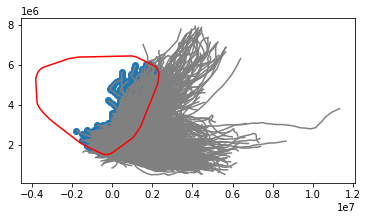

In [9]:
#plot to check
m=nodes_500km.plot()
tracks_500km.plot(ax=m,color='grey')
buffer.boundary.plot(ax=m,color='red')


In [10]:
# save the filtered nodes and results
tracks_500km.reset_index(drop=True,inplace=True)
nodes_500km.reset_index(drop=True,inplace=True)
tracks_500km.to_file(os.path.join(indir,'CMA_Tracks_500km.shp'))
nodes_500km.to_file(os.path.join(indir,'CMA_Tracks_Nodes_500km.shp'))
